# **Домашнее задание 6**

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [11]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [12]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [14]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [15]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [16]:
def residual(y, z):
    return - (z - y)

In [17]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [25]:
def get_error_trees_plot(n_trees_list, train_err, test_err):
    plt.xlabel('Tree number')
    plt.ylabel('MSE')
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [19]:
def get_error_depth_plot(max_depth_list, train_err, test_err):
    plt.xlabel('Max Depth')
    plt.ylabel('MSE')
    # plt.xlim(0, (max_depth + 1))
    plt.plot(max_depth_list, train_errors_depth, label='train error')
    plt.plot(max_depth_list, test_errors_depth, label='test error')
    plt.show()

Построим график зависимости величины ошибки от количества деревьев в ансамбле:

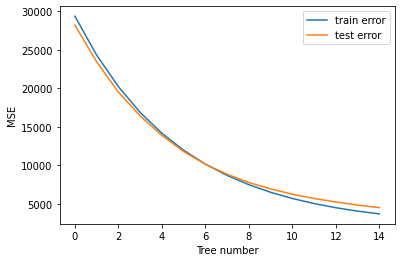

In [26]:
# Число деревьев в ансамбле
n_trees_list = [_ for _ in range(1, 16)]

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

train_errors_trees = []
test_errors_trees = []
for n_trees in n_trees_list:
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    train_errors_trees.append(train_errors)
    test_errors_trees.append(test_errors)
get_error_trees_plot(n_trees_list, train_errors, test_errors)

Вывод: при обучении модели градиентного бустинга с увеличением количества деревьев в ансамбле переобучение практически не происходит, ошибка быстро уменьшается и на трейне и на тесте (на трейне чуть быстрее с увеличением количества деревьев).

Построим график зависимости величины ошибки от величины максимальной глубины дереьев в ансамбле:

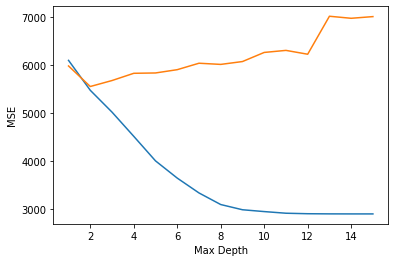

In [22]:
# Число деревьев в ансамбле
n_trees = 16

# Максимальная глубина деревьев
max_depth_list = [_ for _ in range(1, 16)]

# Шаг
eta = 0.1

train_errors_depth = []
test_errors_depth = []
for max_depth in max_depth_list:
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    train_errors_depth.append(train_errors[n_trees - 1])
    test_errors_depth.append(test_errors[n_trees - 1])
get_error_depth_plot(max_depth_list, train_errors, test_errors)

Вывод: при обучении модели градиентного бустинга с увеличением максимальной глубины в деревьях ансамбля происходит переобучение (в данном случае, оптимальной глубиной будет 2).